In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the function to fit
def decDRC(c, kd, h=1, Max=1, Min=0):
    top=(c**h)
    bot=(c**h)+(kd**h)
    res = 1-(top/bot)
    res = Max*res + Min
    return res

# Generate example data
x = np.array([0.0003,0.001,0.003,0.01,0.177])
y = np.array([1.664189298,0.814404835,0.837508998,0.783916765,1])

#initial
start=(0.003,1)

#Constraints
bounds=([0.001,1], [0.1, 1.5])

# Fit the curve
popt, pcov = curve_fit(decDRC, x, y, p0=start, bounds=bounds)

popt

array([0.09999999, 1.        ])

In [13]:
# Extract the optimized parameters
kd_fit, h_fit = popt

# Generate x values for the fitted curve
x_new = np.linspace(1e-4, 1, 100)
y_fit = decDRC(x_new, kd_fit, h_fit)

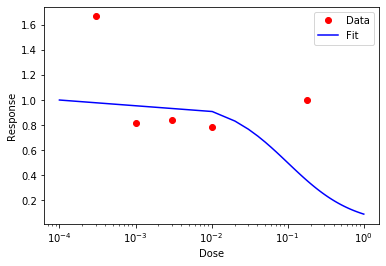

In [14]:
# Plot the data and the fitted curve
plt.plot(x, y, 'ro', label='Data')
plt.plot(x_new, y_fit, 'b-', label='Fit')
plt.xscale("log")
plt.xlabel('Dose')
plt.ylabel('Response')
plt.legend()
plt.show()